**Import the Libraries**

In [2]:
# import the libraries
import pandas as pd
import numpy as np

In [3]:
# import the visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [5]:
df = sns.load_dataset("titanic")

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
#Remove columns that are similar
columns_to_drop = ["alive", "class", "embarked"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis**

*Analyze missing values*

In [12]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [13]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [14]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

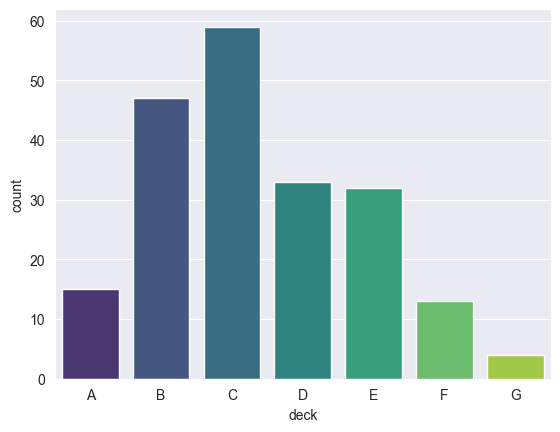

In [15]:
#There's just too many missing values in the deck variable
#but before we remove it:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

In [16]:
#Let's determine who's going to survive according to this variable


<Axes: xlabel='deck', ylabel='count'>

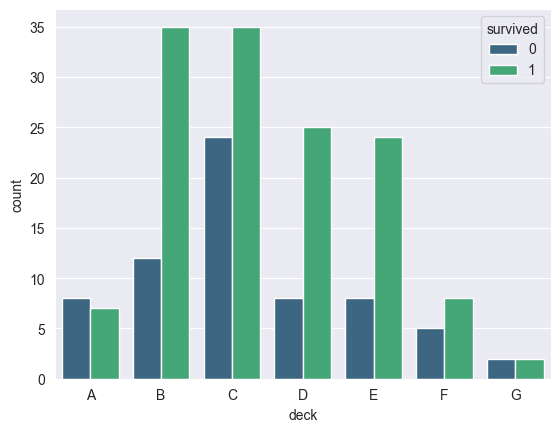

In [17]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df,hue = "survived", palette = "viridis")

In [18]:
columns_to_drop = ["deck"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


*Analyzing the age variable according to the pclass variable*

<Axes: xlabel='pclass', ylabel='age'>

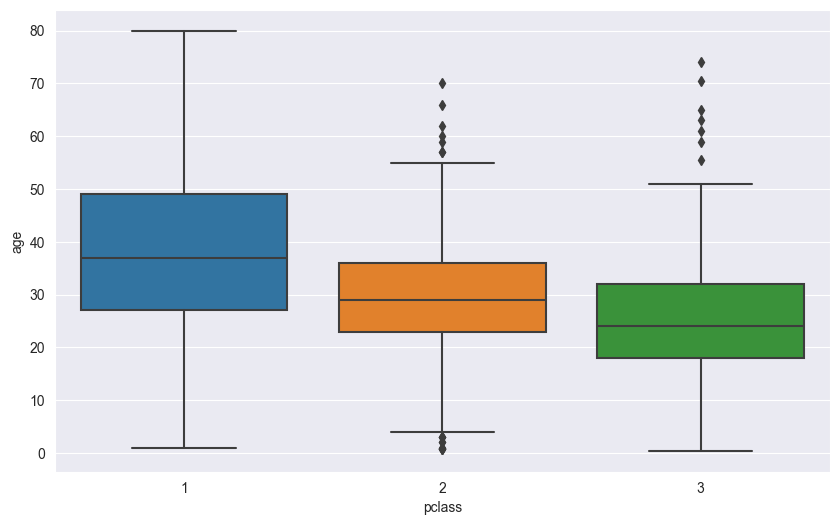

In [21]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [22]:
# function that fills the missing values in age column with the Q2s according to pclass
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
# The function expects columns to be a list containing two elements: age and pclass.
# It assigns the first element to age and the second to pclass.
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [23]:
# apply the function to the age variable
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [24]:
# look for any missing values
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
pd.DataFrame(null_num, index = df.columns, columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [51]:
# drop the 2 NaNs 
df.dropna(inplace = True)

In [53]:
# look for any missing values
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
pd.DataFrame(null_num, index = df.columns, columns = ["Total missing values"])

,Total missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0
